In [48]:
import statsmodels as sm
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [9]:
# load dataset
affair_data = sm.datasets.fair.load_pandas().data
affair_data.head(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [10]:
# add "affair" column: 1 represents having affairs, 0 represents not
X_data = affair_data.drop(['affairs'], 1)
labels = (affair_data.affairs > 0).astype(int)
labels.value_counts()

0    4313
1    2053
Name: affairs, dtype: int64

In [11]:
affair_data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_data, labels,  test_size=0.3, random_state=0)
X_train.head(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
2411,5.0,27.0,6.0,1.0,2.0,16.0,2.0,6.0
4083,4.0,42.0,23.0,4.0,3.0,14.0,3.0,5.0
3196,5.0,37.0,23.0,4.0,2.0,14.0,3.0,5.0
3035,5.0,22.0,2.5,0.0,2.0,12.0,3.0,4.0
1772,3.0,22.0,2.5,0.0,3.0,14.0,5.0,4.0


In [13]:
def encode_onehot(df, cols):
    """
    One-hot encoding is applied to columns specified in a pandas DataFrame.
    
    Modified from: https://gist.github.com/kljensen/5452382
    
    Details:
    
    http://en.wikipedia.org/wiki/One-hot
    http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
    
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with one-hot encoding
    """
    vec = DictVectorizer()
    
    df_str = df[cols].astype(str)
    vec_data = pd.DataFrame(vec.fit_transform(df_str[cols].to_dict(orient='records')).toarray())
    vec_data.columns = vec.get_feature_names()
    print(vec_data.columns)
    vec_data.index = df.index
    
    df = df.drop(cols, axis=1)
    df = df.join(vec_data)
    return df

In [14]:
# enc = OneHotEncoder(sparse= False)
# enc.fit(affair_data[['religious', 'educ', 'occupation', 'occupation_husb']])
# enc.transform([[1.0, 17.0, 4.0, 5.0]]).toarray()
ohe_columns = ['religious', 'educ', 'occupation', 'occupation_husb']

X_train_ohe = encode_onehot(X_train, ohe_columns)

X_train_ohe.head(5)

Index(['educ=12.0', 'educ=14.0', 'educ=16.0', 'educ=17.0', 'educ=20.0',
       'educ=9.0', 'occupation=1.0', 'occupation=2.0', 'occupation=3.0',
       'occupation=4.0', 'occupation=5.0', 'occupation=6.0',
       'occupation_husb=1.0', 'occupation_husb=2.0', 'occupation_husb=3.0',
       'occupation_husb=4.0', 'occupation_husb=5.0', 'occupation_husb=6.0',
       'religious=1.0', 'religious=2.0', 'religious=3.0', 'religious=4.0'],
      dtype='object')


,rate_marriage,age,yrs_married,children,educ=12.0,educ=14.0,educ=16.0,educ=17.0,educ=20.0,educ=9.0,...,occupation_husb=1.0,occupation_husb=2.0,occupation_husb=3.0,occupation_husb=4.0,occupation_husb=5.0,occupation_husb=6.0,religious=1.0,religious=2.0,religious=3.0,religious=4.0
2411,5.0,27.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4083,4.0,42.0,23.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3196,5.0,37.0,23.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3035,5.0,22.0,2.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1772,3.0,22.0,2.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
clf = LogisticRegression()
scores = cross_validation.cross_val_score(clf, X_train_ohe, y_train, cv=5)
roc_score= cross_validation.cross_val_score(clf, X_train_ohe, y_train, cv=5, scoring='roc_auc')
print('accuracy:{}'.format(scores.mean()))
print('roc_auc_score: {}'.format(roc_score.mean()))

accuracy:0.7208208140196183
roc_auc_score: 0.7419054866628005


## Support Vector Machine

In [56]:
clf= SVC(kernel='rbf', C=5)

scores = cross_validation.cross_val_score(clf, X_train_ohe, y_train, cv=5)
roc_score= cross_validation.cross_val_score(clf, X_train_ohe, y_train, cv=5, scoring='roc_auc')
print('accuracy:{}'.format(scores.mean()))
print('roc_auc_score: {}'.format(roc_score.mean()))

accuracy:0.7120701282883644
roc_auc_score: 0.7149969357996513


## Random Forest method

### Gradient boosting method 


Model Report
Accuracy : 0.7462
AUC Score (Train): 0.787516
Confusion matrix: 
[[2702  308]
 [ 823  623]]
CV Score : Mean - 0.7478468 | Std - 0.02011003 | Min - 0.7206658 | Max - 0.7750286


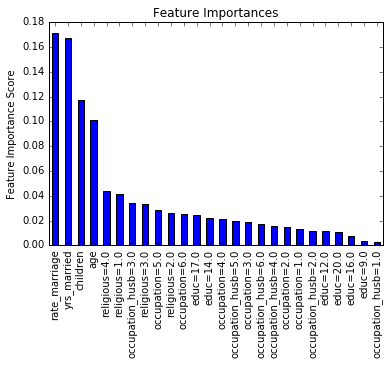

In [51]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn import metrics
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

def modelfit(alg, dtrain, predictors, dlabels, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dlabels)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors],dlabels, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dlabels, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dlabels, dtrain_predprob))
    print("Confusion matrix: \n{}".format(confusion_matrix(y_true= dlabels, y_pred =dtrain_predictions)))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X_train_ohe, X_train_ohe.columns, y_train)

In [27]:
param_test1 = {'n_estimators':np.arange(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=60,min_samples_leaf=5,max_depth=5,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train_ohe, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=5, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=5, min_samples_split=60,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': array([20, 30, 40, 50, 60, 70, 80])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [29]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.74108, std: 0.02179, params: {'n_estimators': 20},
  mean: 0.74363, std: 0.02246, params: {'n_estimators': 30},
  mean: 0.74451, std: 0.02172, params: {'n_estimators': 40},
  mean: 0.74496, std: 0.02156, params: {'n_estimators': 50},
  mean: 0.74531, std: 0.02104, params: {'n_estimators': 60},
  mean: 0.74554, std: 0.02196, params: {'n_estimators': 70},
  mean: 0.74439, std: 0.02186, params: {'n_estimators': 80}],
 {'n_estimators': 70},
 0.745540405227613)

In [31]:
param_test2 = {'max_depth':np.arange(5,16,2), 'min_samples_split':np.arange(10,100,20), 'min_samples_leaf':np.arange(5,20,3)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train_ohe, y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.74240, std: 0.01904, params: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 5},
  mean: 0.74292, std: 0.01854, params: {'min_samples_split': 30, 'min_samples_leaf': 5, 'max_depth': 5},
  mean: 0.74377, std: 0.02015, params: {'min_samples_split': 50, 'min_samples_leaf': 5, 'max_depth': 5},
  mean: 0.74550, std: 0.02177, params: {'min_samples_split': 70, 'min_samples_leaf': 5, 'max_depth': 5},
  mean: 0.74703, std: 0.02129, params: {'min_samples_split': 90, 'min_samples_leaf': 5, 'max_depth': 5},
  mean: 0.74439, std: 0.02054, params: {'min_samples_split': 10, 'min_samples_leaf': 8, 'max_depth': 5},
  mean: 0.74619, std: 0.01905, params: {'min_samples_split': 30, 'min_samples_leaf': 8, 'max_depth': 5},
  mean: 0.74638, std: 0.02102, params: {'min_samples_split': 50, 'min_samples_leaf': 8, 'max_depth': 5},
  mean: 0.74741, std: 0.02065, params: {'min_samples_split': 70, 'min_samples_leaf': 8, 'max_depth': 5},
  mean: 0.74837, std: 0.02253, params: {'min_samples_sp


Model Report
Accuracy : 0.746
AUC Score (Train): 0.793903
Confusion matrix: 
[[2691  319]
 [ 813  633]]
CV Score : Mean - 0.7484765 | Std - 0.02158613 | Min - 0.7187518 | Max - 0.7787633


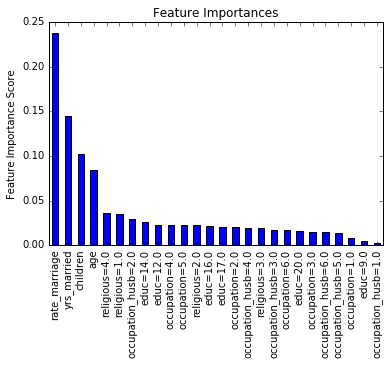

In [53]:
modelfit(gsearch2.best_estimator_, X_train_ohe, X_train_ohe.columns, y_train)

In [36]:
param_test4 = {'max_features':np.arange(3,10,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,max_depth=5, min_samples_split=90, min_samples_leaf=5, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train_ohe,y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.74576, std: 0.02115, params: {'max_features': 3},
  mean: 0.74703, std: 0.02129, params: {'max_features': 5},
  mean: 0.74675, std: 0.01857, params: {'max_features': 7},
  mean: 0.74369, std: 0.01998, params: {'max_features': 9}],
 {'max_features': 5},
 0.74703074427563365)

In [37]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,max_depth=5,min_samples_split=90, min_samples_leaf=5, random_state=10,max_features=5),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train_ohe,y_train)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.74362, std: 0.02156, params: {'subsample': 0.6},
  mean: 0.74710, std: 0.01966, params: {'subsample': 0.7},
  mean: 0.74643, std: 0.02114, params: {'subsample': 0.75},
  mean: 0.74703, std: 0.02129, params: {'subsample': 0.8},
  mean: 0.74506, std: 0.01910, params: {'subsample': 0.85},
  mean: 0.74480, std: 0.02224, params: {'subsample': 0.9}],
 {'subsample': 0.7},
 0.74710492329390843)


Model Report
Accuracy : 0.7487
AUC Score (Train): 0.792824
Confusion matrix: 
[[2716  294]
 [ 826  620]]
CV Score : Mean - 0.7475524 | Std - 0.018873 | Min - 0.7224132 | Max - 0.7777151


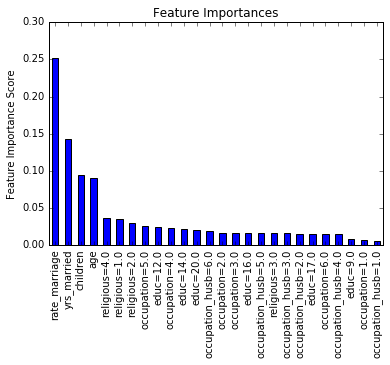

In [52]:
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=120,max_depth=5, min_samples_split=90, min_samples_leaf=5, subsample=0.7, random_state=10, max_features=5)
modelfit(gbm_tuned_1, X_train_ohe, X_train_ohe.columns, y_train)